## Triple modality AE (T_EM) 

In [2]:
import torch
import os.path
import torch.nn as nn
import numpy as np
import pandas as pd
import cplAE_MET.utils.utils as ut
import cplAE_MET.utils.plots as utplt
import cplAE_MET.utils.load_helpers as loader
import cplAE_MET.utils.analysis_helpers as analysis
import matplotlib.pyplot as plt
from collections import Counter
import cplAE_MET.utils.analysis_helpers as ana
import cplAE_MET.utils.plots as utplt
import seaborn as sns
import skimage.io
import skimage.filters
from cplAE_MET.utils.dataset import load_M_inh_dataset
import torch.nn.functional as F
results_dir = "/Users/fahimehb/Documents/git-workspace/cplAE_MET/data/results/DEBUG/"
%matplotlib qt5

In [3]:
def plot_losses(results_dir, log_file):
    df = pd.read_csv(results_dir+log_file)
    plt.plot(df["train_loss_xm"], label="train_loss_xm")
    plt.plot(df["val_loss_xm"], label="val_loss_xm")
    plt.plot(df["train_loss_xsd"], label="train_loss_xsd")
    plt.plot(df["val_loss_xsd"], label="val_loss_xsd")
    plt.xlabel("epochs")
    plt.legend()


# No conv layers, no noise and no scaling, alpha_M = alpha_sd = 1

In [15]:
log_file = "/tb_logs/DEBUGMAE0_aM_1-0_asd_1-0_noise_0-0_dilate_0_scale_0-1_ld_3_ne_50000_ri_0_fold_0.csv"
sum_file = "checkpoint_ep_49999_MAE0_aM_1-0_asd_1-0_noise_0-0_dilate_0_scale_0-1_ld_3_ne_50000_ri_0_fold_0.pkl"
plot_losses(results_dir, log_file)

# 1 conv layers, no noise and no scaling, alpha_M = alpha_sd = 1

In [12]:
log_file = "/tb_logs/DEBUGMAE1_aM_1-0_asd_1-0_noise_0-0_dilate_0_scale_0-0_ld_3_ne_50000_ri_0_fold_0.csv"
sum_file = "checkpoint_ep_1999_MAE1_aM_1-0_asd_1-0_noise_0-0_dilate_0_scale_0-0_ld_3_ne_50000_ri_0_fold_0.pkl"
plot_losses(results_dir, log_file)

# 1 conv layers, no noise and no scaling, alpha_M =5, alpha_sd = 1

In [13]:
log_file = "/tb_logs/DEBUGMAE2_aM_5-0_asd_1-0_noise_0-0_dilate_0_scale_0-0_ld_3_ne_50000_ri_0_fold_0.csv"
sum_file = "checkpoint_ep_1399_MAE2_aM_5-0_asd_1-0_noise_0-0_dilate_0_scale_0-0_ld_3_ne_50000_ri_0_fold_0.pkl"
plot_losses(results_dir, log_file)

# 2 conv layers, no noise and no scaling, alpha_M =5, alpha_sd = 1

In [14]:
log_file = "/tb_logs/DEBUGMAE3_aM_5-0_asd_1-0_noise_0-0_dilate_0_scale_0-0_ld_3_ne_50000_ri_0_fold_0.csv"
sum_file = "checkpoint_ep_2799_MAE3_aM_5-0_asd_1-0_noise_0-0_dilate_0_scale_0-0_ld_3_ne_50000_ri_0_fold_0.pkl"
plot_losses(results_dir, log_file)

## 2 conv layers, no noise, alpha_M =5, alpha_sd = 1, scale=0.1

In [16]:
log_file = "/tb_logs/DEBUGMAE3_aM_5-0_asd_1-0_noise_0-0_dilate_0_scale_0-1_ld_3_ne_50000_ri_0_fold_0.csv"
sum_file = "checkpoint_ep_1599_MAE3_aM_5-0_asd_1-0_noise_0-0_dilate_0_scale_0-1_ld_3_ne_50000_ri_0_fold_0.pkl"
plot_losses(results_dir, log_file)

## 2 conv layers, no noise, alpha_M =50, alpha_sd = 1, scale=0.1


In [125]:
log_file = "/tb_logs/DEBUGMAE3_aM_50-0_asd_1-0_noise_0-0_dilate_0_scale_0-1_ld_3_ne_50000_ri_0_fold_0.csv"
sum_file = "checkpoint_ep_22999_MAE3_aM_50-0_asd_1-0_noise_0-0_dilate_0_scale_0-1_ld_3_ne_50000_ri_0_fold_0.pkl"
plot_losses(results_dir, log_file)

## 2 conv layers, no noise, alpha_M =50, alpha_sd = 1, scale=0.05


In [18]:
log_file = "/tb_logs/DEBUGMAE3_aM_50-0_asd_1-0_noise_0-0_dilate_0_scale_0-05_ld_3_ne_50000_ri_0_fold_0.csv"
sum_file = "checkpoint_ep_18999_MAE3_aM_50-0_asd_1-0_noise_0-0_dilate_0_scale_0-05_ld_3_ne_50000_ri_0_fold_0.pkl"
plot_losses(results_dir, log_file)

## 2 conv layers, noise=0.05, alpha_M =50, alpha_sd = 1, scale=0.05


In [7]:
log_file = "/tb_logs/DEBUGMAE3_aM_50-0_asd_1-0_noise_0-05_dilate_0_scale_0-05_ld_3_ne_50000_ri_0_fold_0.csv"
sum_file = "checkpoint_ep_1999_MAE3_aM_50-0_asd_1-0_noise_0-05_dilate_0_scale_0-05_ld_3_ne_50000_ri_0_fold_0.pkl"
plot_losses(results_dir, log_file)

## 2 conv layers, noise=0.0, alpha_M =5, alpha_sd = 1, scale=0.05, reconstruct with respect to the original xm and xsd


In [31]:
log_file = "/tb_logs/DEBUGMAE4_aM_5-0_asd_1-0_noise_0-0_dilate_0_scale_0-05_ld_3_ne_50000_ri_0_fold_0.csv"
sum_file = "checkpoint_ep_2499_MAE4_aM_5-0_asd_1-0_noise_0-0_dilate_0_scale_0-05_ld_3_ne_50000_ri_0_fold_0.pkl"
plot_losses(results_dir, log_file)

## 2 conv layers, noise=0.0, alpha_M =5, alpha_sd = 1, scale=0.0, shifting instead of scaling


In [35]:
log_file = "/tb_logs/DEBUGMAE5_aM_5-0_asd_1-0_noise_0-0_dilate_0_scale_0-0_ld_3_ne_50000_ri_0_fold_0.csv"
sum_file = "checkpoint_ep_1299_MAE5_aM_5-0_asd_1-0_noise_0-0_dilate_0_scale_0-0_ld_3_ne_50000_ri_0_fold_0.pkl"
plot_losses(results_dir, log_file)

In [16]:
output = ut.loadpkl(results_dir+sum_file)

left = output
right= output
utplt.plot_multiple_embeddings(left["z"],
                               right["z"], 
                               figsize=(10,10),
                               plot_dim=3, 
                               left_color=left['cluster_color'],
                               right_color=right['cluster_color'],
                               left_marker='o',
                               right_marker='o',
                               side_by_side=False,
                               scatter_point_size=5)

No handles with labels found to put in legend.


In [17]:
def allnans(x):
    return np.all(np.isnan(x.reshape(np.shape(x)[0], -1)), axis=(1))


soma_depth = []
soma_depth_recons = []
for fold in range(1):
    mask_1D_M = ~allnans(output["XM"])
    M_sample_ids = np.where(mask_1D_M)[0]
    M_val_sample_ids = [i for i in M_sample_ids if i in output['val']] 
    soma_depth_recons = soma_depth_recons + output['Xr_sd'][M_val_sample_ids].tolist()
    soma_depth = soma_depth + output['X_sd'][M_val_sample_ids].tolist()
    soma_depth = soma_depth - np.min(soma_depth)
    soma_depth = soma_depth / np.max(soma_depth)
    
fig = plt.figure(figsize=(15,5))
plt.scatter([i for i in range(len(soma_depth))], soma_depth, label="soma_depth")
plt.scatter([i for i in range(len(soma_depth_recons))], soma_depth_recons, label="soma_depth_recons")
plt.ylabel("soma depth")
plt.xlabel("cells")
plt.legend()

In [18]:
def allnans(x):
    return np.all(np.isnan(x.reshape(np.shape(x)[0], -1)), axis=(1))

mask_1D_M = ~allnans(output["XM"])

M_sample_ids = np.where(mask_1D_M)[0]
M_val_sample_ids = [i for i in M_sample_ids if i in output['val']] 
len(M_val_sample_ids)

X_true = np.squeeze(output['XM'])
X_pred = np.squeeze(output['XrM'])


for i in M_val_sample_ids[0:10]:
    print
    utplt.show_ax_de_maps(X_true[i], X_pred[i])
    plt.show()

In [7]:
cell = 300
axon = 0
dendrite = 1

soma_depth = int(np.squeeze(output['X_sd'])[cell] * 100 + 20)
soma_image = np.zeros(output['XM'][cell, 0].shape)
soma_image[soma_depth, :, :] = 1

plt.plot(output['XM'][cell, 0,:,:,dendrite].flatten(), label="dend", alpha=1)
plt.plot(output['XM'][cell, 0,:,:,axon].flatten(), label="axon", alpha=0.5)
plt.plot(soma_image[:,:,0].flatten(), label="soma", color="red")

plt.legend()

In [42]:
%matplotlib 
cell = 10

# sns.heatmap(input_mat['XM'][cell, :, :, 0], cbar=False)
# print(input_mat['X_sd'][cell] * 100 )

Using matplotlib backend: Qt5Agg


In [9]:
cell = 10
sns.heatmap(output['XM'][cell, 0, :, :, 0], cbar=False)
print(output['X_sd'][cell] * 100 + 20)

[42.314]


In [46]:
torch.max(h[i, 0, :, :, 0:2])

tensor(24.7823, dtype=torch.float64)

In [102]:
h = torch.tensor(output['XM'])
rand_shifts = torch.zeros((h.shape[0],), dtype=torch.int)
for i in range(h.shape[0]):
    select = torch.nonzero(h[i, 0, :, :, :])
    zrange = torch.min(select[:, 0]), torch.max(select[:, 0])
    low = -1 * zrange[0].item()
    high = (h.shape[2] - zrange[1]).item()
    rand_shifts[i] = torch.randint(low, high, (1,)).item()
    print(zrange[0].item(), zrange[1].item(), rand_shifts[i].item())
    if rand_shifts[i].item() < 0:
        if rand_shifts[i].item() > low:
            print("NOOO")


37 105 26
70 113 -22
NOOO
63 87 49
35 85 9
52 88 -17
NOOO
41 94 34
33 95 9
41 89 -24
NOOO
49 114 28
41 113 19
63 113 9
57 121 28
43 107 -40
NOOO
51 92 -46
NOOO
66 104 -27
NOOO
55 92 25
61 97 3
46 87 -3
NOOO
68 90 -59
NOOO
69 98 -42
NOOO
57 110 -3
NOOO
59 109 -17
NOOO
56 88 -53
NOOO
38 96 12
34 105 53
39 97 16
35 103 8
55 93 -8
NOOO
61 101 -17
NOOO
59 100 48
55 100 -2
NOOO
60 94 7
31 108 -27
NOOO
63 90 -4
NOOO
60 110 21
66 101 49
56 106 -17
NOOO
21 95 30
14 116 36
37 110 -17
NOOO
50 84 68
41 102 -28
NOOO
59 97 -26
NOOO
51 126 -14
NOOO
71 94 -14
NOOO
25 105 6
52 101 -46
NOOO
56 103 -28
NOOO
58 99 -8
NOOO
67 101 -62
NOOO
47 103 40
64 110 -16
NOOO
52 100 -11
NOOO
32 96 -21
NOOO
51 113 19
64 114 -40
NOOO
56 111 6
54 94 41
37 132 4
54 91 18
40 92 -1
NOOO
11 112 33
34 95 -26
NOOO
28 122 35
18 94 6
32 96 44
43 98 -40
NOOO
50 111 41
46 107 52
36 98 -2
NOOO
52 86 -12
NOOO
68 105 1
48 103 -12
NOOO
49 112 0
16 102 -13
NOOO
38 112 35
39 102 51
52 129 28
55 97 18
72 101 -57
NOOO
38 103 -22
NOOO
42 1

70 110 -43
NOOO
63 90 -10
NOOO
63 97 -39
NOOO
56 129 11
66 123 -39
NOOO
66 137 -64
NOOO
66 137 -42
NOOO
48 98 40
23 111 29
50 105 -25
NOOO
65 119 -53
NOOO
70 87 -9
NOOO
56 111 -6
NOOO
29 109 19
42 106 47
23 88 59
48 97 29
52 102 -40
NOOO
35 111 8
16 113 34
44 88 63
39 98 -39


In [38]:
def get_dilation_mask(x):
    x = x.unsqueeze(x, 1)
    ax, de = torch.tensor_split(x, 2, dim=1)
    ax = torch.transpose(torch.transpose(ax, 3, 2), 2, 1)
    de = torch.transpose(torch.transpose(de, 3, 2), 2, 1)

    kernel_tensor = torch.tensor(
            [[[[0., 1., 0.],
               [1., 1., 1.],
               [0., 1., 0.]]]])

    dilated_mask_ax = torch.clamp(nn.Conv3d(ax, kernel_tensor, padding=(1, 1)), 0, 1)
    dilated_mask_de = torch.clamp(nn.Conv3d(de, kernel_tensor, padding=(1, 1)), 0, 1)
    dilated_mask_M = torch.cat(tensors=(dilated_mask_ax, dilated_mask_de), dim=1).bool()
    return dilated_mask_M

In [136]:
x = torch.tensor([[[
         [ 0.0, -0.0],
          [ 1.,  0.],
          [ 0., -0.],
          [-0.1,  0.]],

         [[-0.1,  0.3157],
          [-1.,  0.],
          [0.,  0.],
          [ 0., -1.]],

         [[ 0.,  0.],
          [ 1., -0.],
          [ 0.,  0.],
          [ 0.,  1.]],

         [[ 0.,  1.],
          [0.,  0.],
          [ 0., 0.],
          [ 0.,  0.]],

         [[ 0.,  0.],
          [-1., -0.],
          [ 0.,  1.],
          [-1.,  1.]]]])

In [137]:
# x = torch.randn(1, 1, 5, 4, 2)
ax, de = torch.tensor_split(x, 2, dim=3)

In [138]:
ax = torch.transpose(torch.transpose(ax, 3, 2), 2, 1)

In [139]:
kernel_tensor = torch.tensor(
            [[[[0., 1., 0.],
               [1., 1., 1.],
               [0., 1., 0.]]]])

In [140]:
ax

tensor([[[[ 0.0000,  1.0000,  0.0000, -0.1000],
          [-0.1000, -1.0000,  0.0000,  0.0000],
          [ 0.0000,  1.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000, -1.0000,  0.0000, -1.0000]]]])

In [142]:
torch.nn.functional.conv2d(ax, kernel_tensor, padding=(1, 1))

tensor([[[[ 0.9000,  0.0000,  0.9000, -0.1000],
          [-1.1000,  0.9000, -1.0000, -0.1000],
          [ 0.9000,  0.0000,  1.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000, -1.0000],
          [-1.0000, -1.0000, -2.0000, -1.0000]]]])

In [133]:
ax.shape

torch.Size([1, 1, 5, 4])

tensor([[[[ 0.0000,  1.0000,  0.0000, -0.1000],
          [-0.1000, -1.0000,  0.0000,  0.0000],
          [ 0.0000,  1.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000, -1.0000,  0.0000, -1.0000]]]])

In [72]:
nn.functional.conv3d(x, kernel_tensor, padding=(1, 1, 0))

RuntimeError: Calculated padded input size per channel: (7 x 6 x 2). Kernel size: (1 x 3 x 3). Kernel size can't be greater than actual input size

In [23]:
def plot_val_loss(model_id, alpha_T, alpha_E, alpha_M, alpha_sd,
                  lambda_T_EM, M_noise, dilate_M, package_dir, exp_name, val_loss_plt, train_loss_plt, ylabel):
    
    output = {}

    fig = plt.figure(figsize=(15,5))
    outdict = {}
    for n_fold in range(1):
        out = loader.get_results_run_id(model_id=model_id, alpha_T=alpha_T, alpha_E=alpha_E, alpha_M=alpha_M,
                                        alpha_sd=alpha_sd, lambda_T_EM=lambda_T_EM, augment_decoders=0, 
                                        E_noise=E_noise, M_noise=M_noise, dilate_M=dilate_M, latent_dim=3, 
                                        batchsize=500, n_epochs=5000, run_iter=0, n_fold=n_fold, package_dir=package_dir,
                                        exp_name=exp_name)
        outdict[n_fold] = out["summary"]

        label = "val_fold_" + str(n_fold)
        plt.plot(out["log"][val_loss_plt], label="val")

    plt.plot(out["log"][train_loss_plt], label="train", c="black")
    plt.xlabel("epochs")
    plt.ylabel(ylabel)
    plt.legend()
    title = "M_noise=" + str(M_noise)
    plt.title(title)
    plt.show()

    output = outdict
    return output

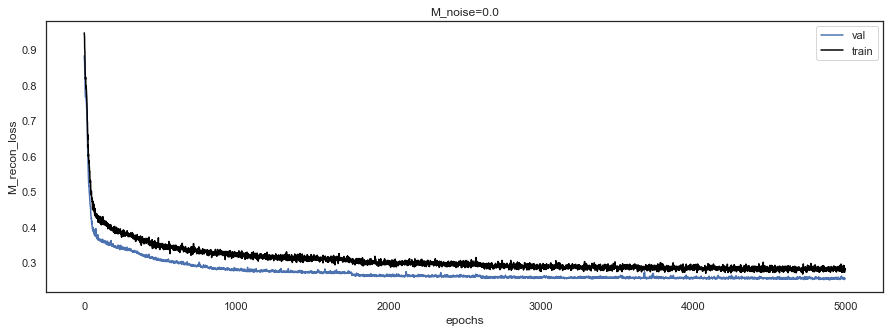

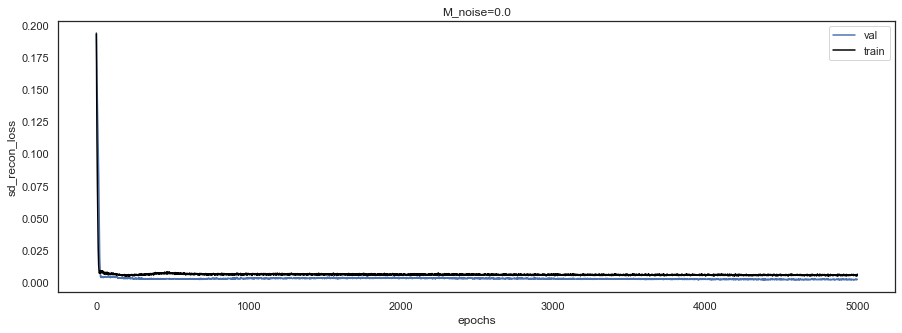

In [4]:
%matplotlib inline

output = {}
alpha_T = 0.0
alpha_E = 0.0
alpha_M = 1.0
alpha_sd = 1.0
lambda_T_EM = 0.0
E_noise = 0.0

expid_model = [("test", "M_AE", 0.0, 0)]

for index, tuple in enumerate(expid_model):
    exp_name = tuple[0]
    model_id = tuple[1]
    M_noise = tuple[2]
    dilate_M = tuple[3]
    
    val_loss_plt= "val_recon_M"
    train_loss_plt= "train_recon_M" 
    ylabel = "M_recon_loss"
    output[exp_name] = plot_val_loss(model_id, alpha_T, alpha_E, alpha_M, alpha_sd, lambda_T_EM, M_noise, 
                             dilate_M, package_dir, exp_name, val_loss_plt, train_loss_plt, ylabel)


    val_loss_plt= "val_recon_sd"
    train_loss_plt= "train_recon_sd" 
    ylabel = "sd_recon_loss"
    output[exp_name] = plot_val_loss(model_id, alpha_T, alpha_E, alpha_M, alpha_sd, lambda_T_EM, M_noise, 
                             dilate_M, package_dir, exp_name, val_loss_plt, train_loss_plt, ylabel)


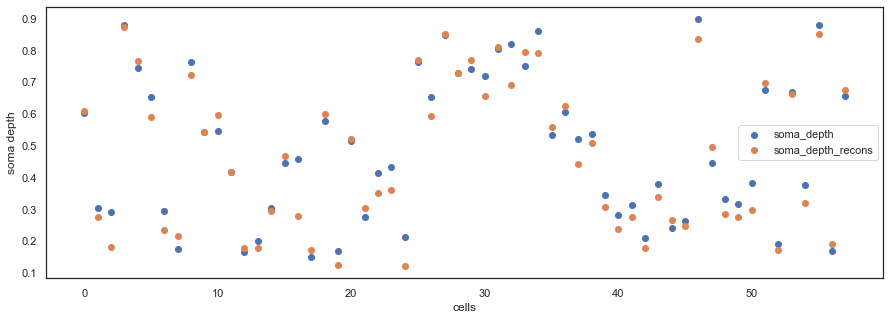

In [5]:
# fold=0
# exp_name = "aT_0-0_aE_0-0_aM_1-0_asd_1-0_lambda_0-0_Mnoise_0-0_shiftM_7-0"
def allnans(x):
    return np.all(np.isnan(x.reshape(np.shape(x)[0], -1)), axis=(1))


soma_depth = []
soma_depth_recons = []
for fold in range(1):
    mask_1D_M = ~allnans(output[exp_name][fold]["XM"])
    M_sample_ids = np.where(mask_1D_M)[0]
    M_val_sample_ids = [i for i in M_sample_ids if i in output[exp_name][fold]['val']] 
    soma_depth_recons = soma_depth_recons + output[exp_name][fold]['Xr_sd'][M_val_sample_ids].tolist()
    soma_depth = soma_depth + output[exp_name][fold]['X_sd'][M_val_sample_ids].tolist()
    
fig = plt.figure(figsize=(15,5))
plt.scatter([i for i in range(len(soma_depth))], soma_depth, label="soma_depth")
plt.scatter([i for i in range(len(soma_depth_recons))], soma_depth_recons, label="soma_depth_recons")
plt.ylabel("soma depth")
plt.xlabel("cells")
plt.legend()

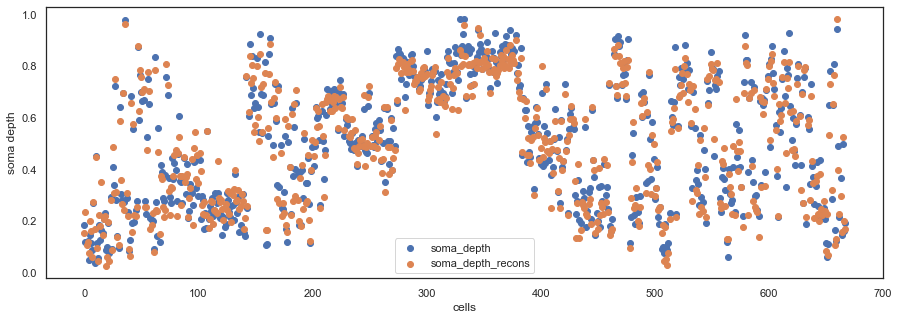

In [6]:
# exp_name = "aT_0-0_aE_0-0_aM_1-0_asd_1-0_lambda_0-0_Mnoise_0-0_shiftM_7-0"
def allnans(x):
    return np.all(np.isnan(x.reshape(np.shape(x)[0], -1)), axis=(1))


soma_depth = []
soma_depth_recons = []
for fold in range(1):
    mask_1D_M = ~allnans(output[exp_name][fold]["XM"])
    M_sample_ids = np.where(mask_1D_M)[0]
    M_val_sample_ids = [i for i in M_sample_ids if i not in output[exp_name][fold]['val']] 
    soma_depth_recons = soma_depth_recons + output[exp_name][fold]['Xr_sd'][M_val_sample_ids].tolist()
    soma_depth = soma_depth + output[exp_name][fold]['X_sd'][M_val_sample_ids].tolist()
    
fig = plt.figure(figsize=(15,5))
plt.scatter([i for i in range(len(soma_depth))], soma_depth, label="soma_depth")
plt.scatter([i for i in range(len(soma_depth_recons))], soma_depth_recons, label="soma_depth_recons")
plt.ylabel("soma depth")
plt.xlabel("cells")
plt.legend()

No handles with labels found to put in legend.


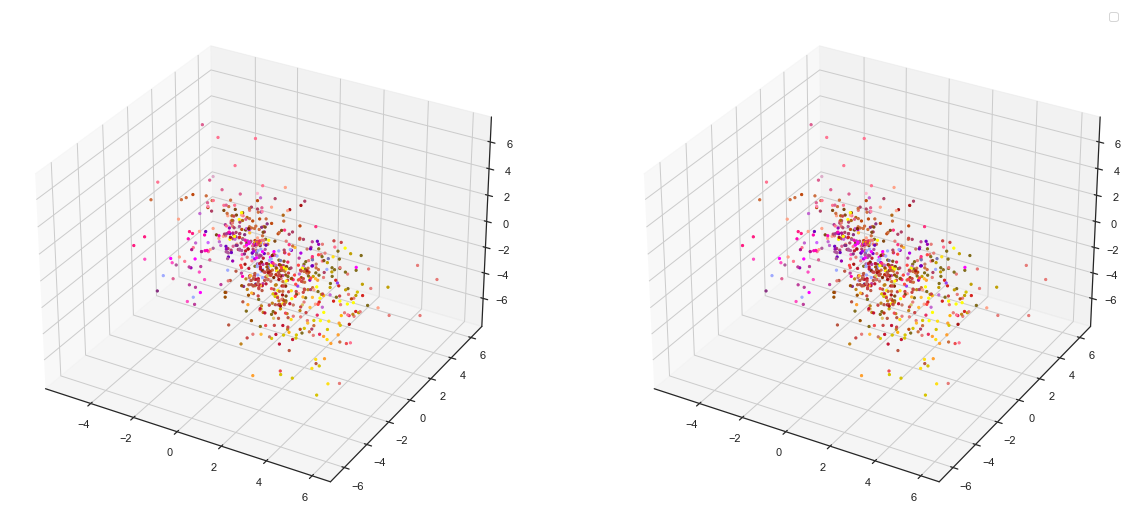

In [6]:
%matplotlib inline
fold = 0
left = output[exp_name][fold]
right= output[exp_name][fold]
utplt.plot_multiple_embeddings(left["zEM"],
                               right["zEM"], 
                               figsize=(20,20),
                               plot_dim=3, 
                               left_color=left['cluster_color'],
                               right_color=right['cluster_color'],
                               left_marker='o',
                               right_marker='o',
                               side_by_side=True,
                               scatter_point_size=5)

In [7]:
# exp_name = "aT_0-0_aE_0-0_aM_1-0_asd_1-0_lambda_0-0_Mnoise_0-0_shiftM_7-0"


58

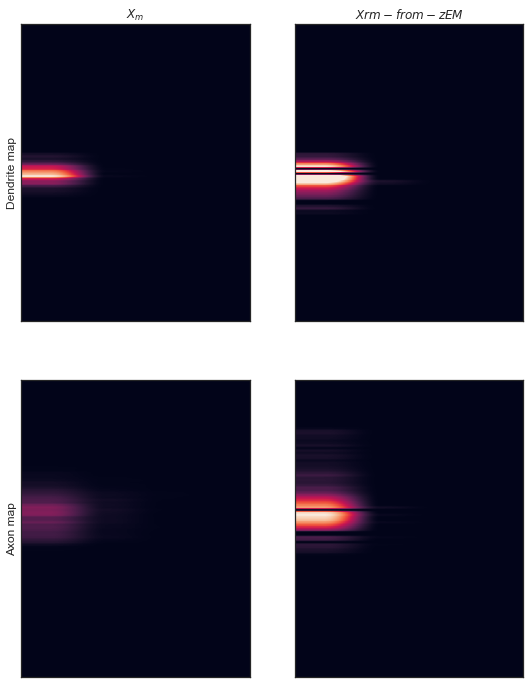

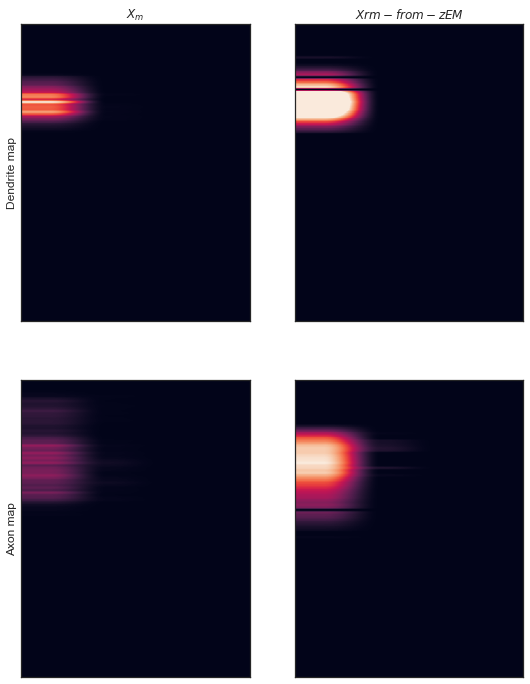

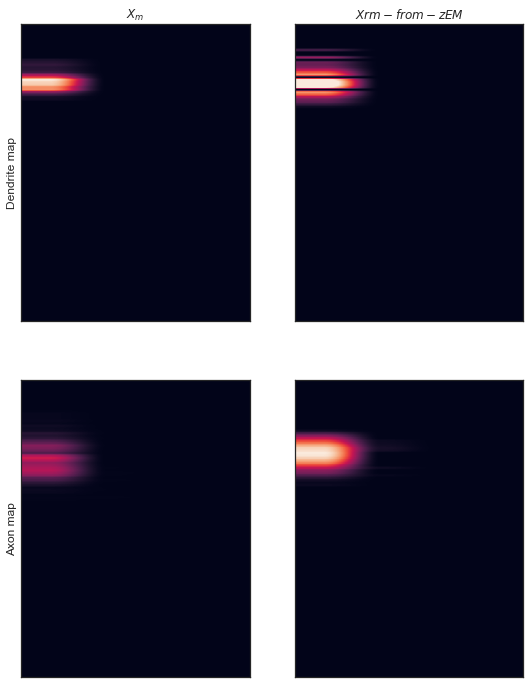

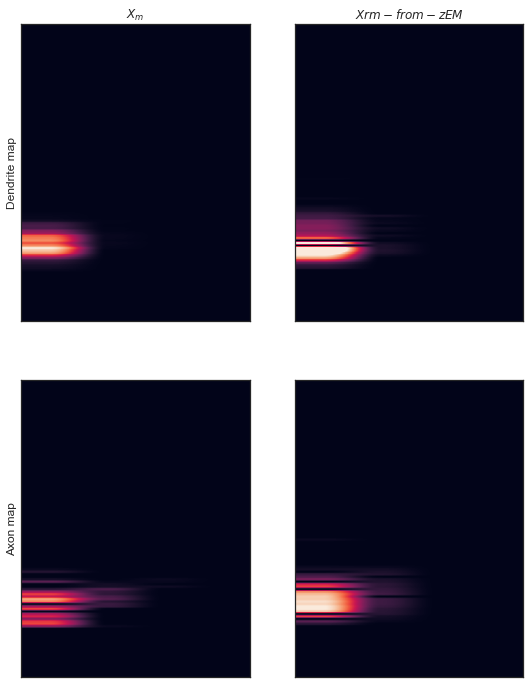

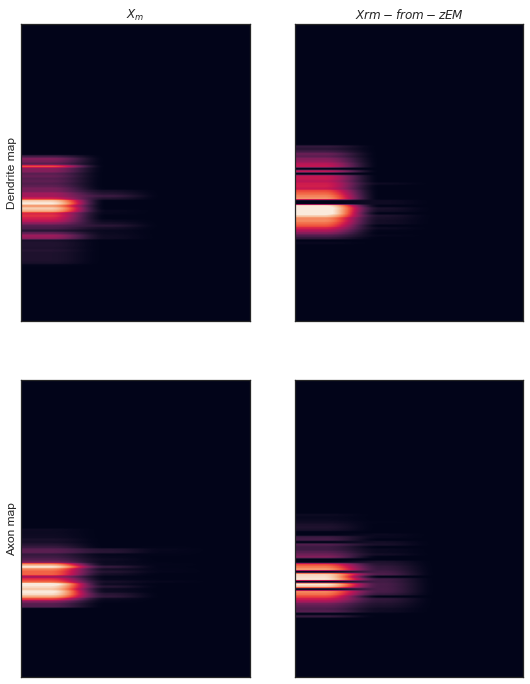

In [8]:
def allnans(x):
    return np.all(np.isnan(x.reshape(np.shape(x)[0], -1)), axis=(1))

mask_1D_M = ~allnans(output[exp_name][fold]["XM"])

M_sample_ids = np.where(mask_1D_M)[0]
M_val_sample_ids = [i for i in M_sample_ids if i in output[exp_name][fold]['val']] 
len(M_val_sample_ids)

from cplAE_MET.utils.plots import show_ax_de_maps
X_true = output[exp_name][fold]['XM']
X_pred = output[exp_name][fold]['XrM']

for i in M_val_sample_ids[0:5]:
    print
    utplt.show_ax_de_maps(X_true[i], X_pred[i])
    #plt.savefig(paths['package'] / f'assets/T_to_M_{ctypes[i]}_{i}.png',dpi=300)
    plt.show()
    print('=========')

In [20]:
import torch
import torch.nn as nn
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output.backward()

In [17]:
input.shape

torch.Size([3, 5])

In [21]:
target


tensor([3, 4, 4])

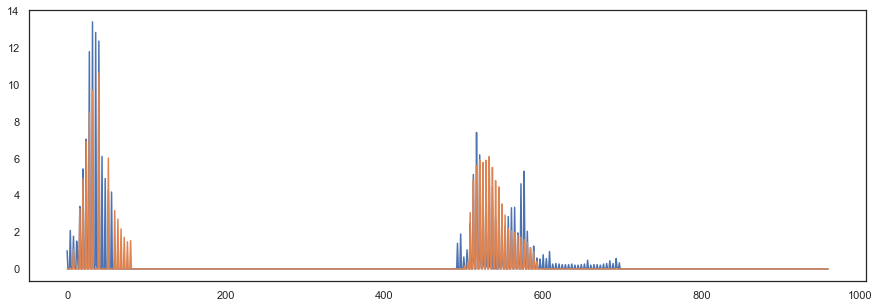

In [9]:
fig = plt.figure(figsize=(15,5))
plt.plot(X_true[5].flatten())
plt.plot(X_pred[5].flatten())

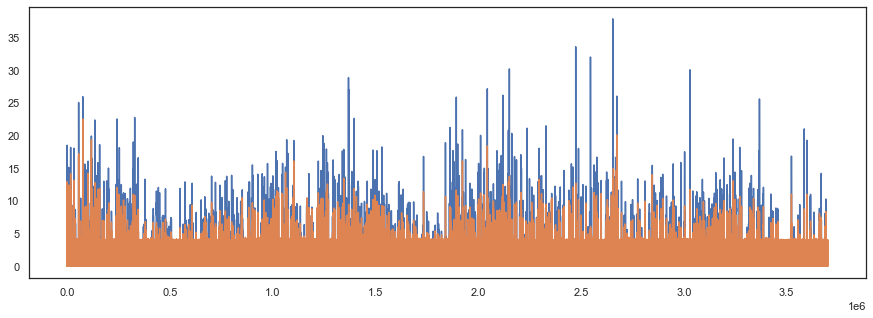

In [10]:
fig = plt.figure(figsize=(15,5))
plt.plot(output[exp_name][0]["XM"].flatten())
plt.plot(output[exp_name][0]["XrM"].flatten())

In [13]:
EXC_genes = ["Slc30a3", "Cux2", "Rorb", "Rspo1", "Hsd11b1", "Fam84b", "Pvalb",  "Foxp2", "Slc17a8", 
             "Trhr", "Tshz2",  "Gpr139", "Nxph4", "Rprm", "Crym"]

NPP_genes = ["Vip", "Npy", "Sst", "Penk", "Tac2", "Cck", "Crh", "Tac1", "Pdyn", "Cort", "Pthlh", "Pnoc", 
             "Adcyap1", "Grp", "Nts", "Rln1", "Vipr1", "Npy1r", "Npy2r", "Npy5r", "Sstr1", "Sstr2", "Sstr4",
            "Oprd1", "Oprm1", "Cckbr", "Crhr1", "Crhr2", "Tacr1", "Oprl1", "Adcyap1r1", "Trhr", "Nmbr",
            "Ntsr1", "Rxfp1", "Rxfp3"]

Good_genes = pd.read_csv('/Users/fahimehb/Documents/git-workspace/cplAE_MET/data/proc/good_genes_beta_score.csv')
Good_genes = Good_genes[Good_genes['BetaScore']>0.4]['Gene'].tolist()

EXC_gene_ids = [Good_genes.index(i) for i in EXC_genes]
NPP_gene_ids = [Good_genes.index(i) for i in NPP_genes]

In [19]:
out1 = output["T_EMzero_Oct5"][5]
out2 = output["T_EM_Oct5"][5]

Rsquared_within_modality_T_E = analysis.compute_r2score(X=out1['XT'],
                                                         Xr=out1['XrT'], 
                                                         which_cols=NPP_gene_ids + EXC_gene_ids, 
                                                         which_rows=out1['val'])


Rsquared_within_modality_T_EM = analysis.compute_r2score(X=out2['XT'],
                                                       Xr=out2['XrT'], 
                                                       which_cols=NPP_gene_ids + EXC_gene_ids, 
                                                       which_rows=out2['val'])

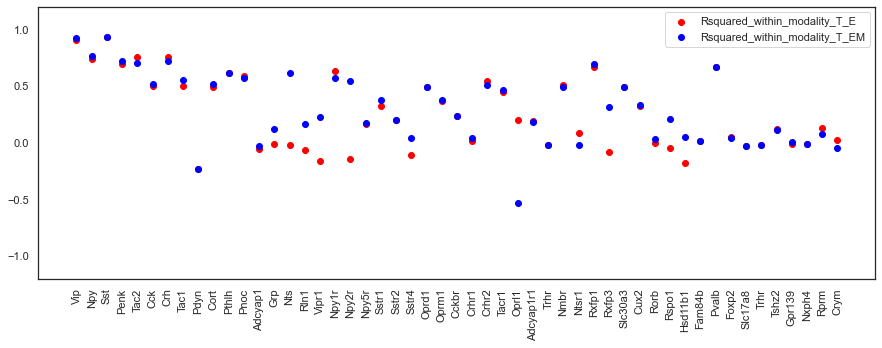

In [20]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.scatter([i for i in range(len(Rsquared_within_modality_T_E))], 
            Rsquared_within_modality_T_E, 
            c="red", 
            label="Rsquared_within_modality_T_E")

plt.scatter([i for i in range(len(Rsquared_within_modality_T_EM))], 
            Rsquared_within_modality_T_EM, 
            c="blue", 
            label="Rsquared_within_modality_T_EM")


plt.xticks(ticks =[i for i in range(len(NPP_genes + EXC_genes))],
           labels = NPP_genes + EXC_genes, rotation=90)
plt.ylim(-1.2,1.2)  
plt.legend()
plt.show()

In [70]:
def allnans(x):
    return np.all(np.isnan(x.reshape(np.shape(x)[0], -1)), axis=(1))

mask_1D_E = ~allnans(out1["XE"])

E_sample_ids = np.where(mask_1D_E)[0]
E_val_sample_ids = [i for i in E_sample_ids if i in out1['val']] 
len(E_val_sample_ids)

386

In [103]:
# Rsquared_within_modality_T_EM

In [78]:
Rsquared_within_modality_TE = analysis.compute_r2score(X=out1['XE'],
                                                       Xr=out1['XrE'],
                                                       which_cols=[i for i in range(100)], 
                                                       which_rows=E_val_sample_ids)

Rsquared_within_modality_T_EM = analysis.compute_r2score(X=out2['XE'],
                                                         Xr=out2['XrE'],
                                                         which_cols=[i for i in range(100)], 
                                                         which_rows=E_val_sample_ids)

In [102]:
out2['XE'].shape

(3855, 121)

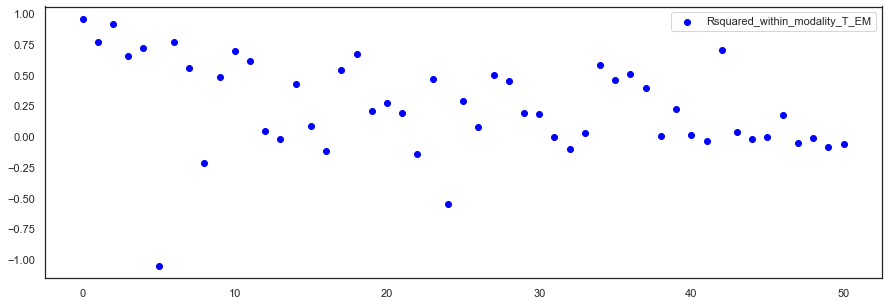

In [92]:
%matplotlib inline
plt.figure(figsize=(15,5))
# plt.scatter([i for i in range(len(Rsquared_within_modality_TE))], 
#             Rsquared_within_modality_TE, 
#             c="red", 
#             label="Rsquared_within_modality_TE")

plt.scatter([i for i in range(len(Rsquared_within_modality_T_EM))], 
            Rsquared_within_modality_T_EM, 
            c="blue", 
            label="Rsquared_within_modality_T_EM")

# plt.ylim(-10.2,10.2)  
plt.legend()
plt.show()